# **Final Project Task 4 - Census Modeling Clustering**

Requirements:

Load Data
- Use the preprocessed dataset from Task 1.

Prepare Features
- Feature Selection:
    - Select relevant numerical and categorical features.
    - Note: K-Means works best with numerical data.
- Data Preprocessing:
    - Be sure you have normalized numerical features (e.g., using MinMaxScaler or StandardScaler) and categorical features encoded properly (e.g., One-Hot Encoding or Ordinal Encoding).
    
Clustering Model Implementation
- Apply K-Means Clustering:
    - Experiment with different values of K (number of clusters).
    - Use the Elbow Method to determine the optimal number of clusters:
    - Use yellowbrick.cluster.KElbowVisualizer to find the best K.
    - Calculate the Silhouette Score to evaluate cluster separation.
- Alternative Clustering Approaches:
    - Experiment with Hierarchical Clustering.
    - Experiment with DBSCAN

Visualize & Interpret Clusters
- Dimensionality Reduction:
    - Apply PCA or t-SNE to reduce dimensions and visualize clusters in 2D.
- Cluster Analysis:
    - Plot the clusters in 2D space.
    - Identify key characteristics of each group.
    - Use only numerical variables to interpret the clusters.
- Example insights:
    - "Older individuals tend to work fewer hours per week."
    - "High-income individuals belong to a specific cluster."

Evaluate Cluster Quality
- Silhouette Score:
    - Compute the Silhouette Score to measure cluster compactness and separation. Higher values indicate better clustering results.
- Cluster Distribution:
    - Analyze how well the data points are distributed across clusters.


Deliverables:
- Notebook code with no errors.
- Visualizations & Analysis:
- Elbow method plot for K selection.
- 2D visualization of clusters.
- Summary of cluster characteristics.
- Cluster evaluation metrics (Silhouette Score).






In [11]:
import pandas as pd

In [17]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

data = pd.read_csv(data_url, header=None, names=columns, na_values=" ?", skipinitialspace=True)
data.sample(10)

age    workclass  fnlwgt     education  education-num  \
2903    42      Private  200574  Some-college             10   
7291    25            ?  122745       HS-grad              9   
18804   31      Private  342730    Assoc-acdm             12   
13643   30  Federal-gov  423064       HS-grad              9   
4551    25    State-gov  261979       HS-grad              9   
17347   48            ?  167381       HS-grad              9   
3173    27      Private   19395  Some-college             10   
31392   64      Private  253759       HS-grad              9   
9312    50      Private  258819       HS-grad              9   
8994    29      Private  188675  Some-college             10   

           marital-status         occupation    relationship   race     sex  \
2903   Married-civ-spouse              Sales         Husband  White    Male   
7291        Never-married                  ?       Own-child  White    Male   
18804           Separated   Transport-moving   Not-in-family  White    Male   
13643           Separated       Adm-clerical  Other-relative  Black    Male   
4551        Never-married     Prof-specialty   Not-in-family  White    Male   
17347             Widowed                  ?       Unmarried  White  Female   
3173   Married-civ-spouse  Handlers-cleaners            Wife  White  Female   
31392       Never-married    Exec-managerial   Not-in-family  White    Male   
9312             Divorced       Craft-repair   Not-in-family  White    Male   
8994   Married-civ-spouse       Craft-repair         Husband  Black    Male   

       capital-gain  capital-loss  hours-per-week native-country income  
2903              0             0              40  United-States  <=50K  
7291              0          1602              40  United-States  <=50K  
18804             0             0              45  United-States  <=50K  
13643             0             0              35  United-States  <=50K  
4551              0             0              40  United-States  <=50K  
17347             0             0              25  United-States  <=50K  
3173              0             0              35  United-States  <=50K  
31392             0             0               3  United-States  <=50K  
9312              0             0              40  United-States   >50K  
8994              0             0              40        Jamaica   >50K

In [3]:
# Example of using KElbowVisualizer

# from yellowbrick.cluster import KElbowVisualizer
# visualizer = KElbowVisualizer(clustering_model, k=(2, 10), metric='distortion', timings=False)
# visualizer.fit(preprocessed_data)
# visualizer.show()
# optimal_k = visualizer.elbow_value_


# Example of using PCA

# from sklearn.decomposition import PCA
# clusters = clustering_model.fit_predict(preprocessed_data)
# pca = PCA(n_components=2)
# pca_result = pca.fit_transform(preprocessed_data)
# pca1 = pca_result[:, 0]
# pca2 = pca_result[:, 1]
# # Visualizing Clusters
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x=pca1, y=pca2, hue=clusters, palette='tab10', data=data, alpha=0.7)
# plt.title(f'PCA Projection of Clusters (K={num_clusters})')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.legend(title='Cluster')
# plt.show()

In [18]:
numerical_features = ["age", "education-num", "capital-gain", "capital-loss", "hours-per-week"]
data_numerical = data[numerical_features]

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numerical)

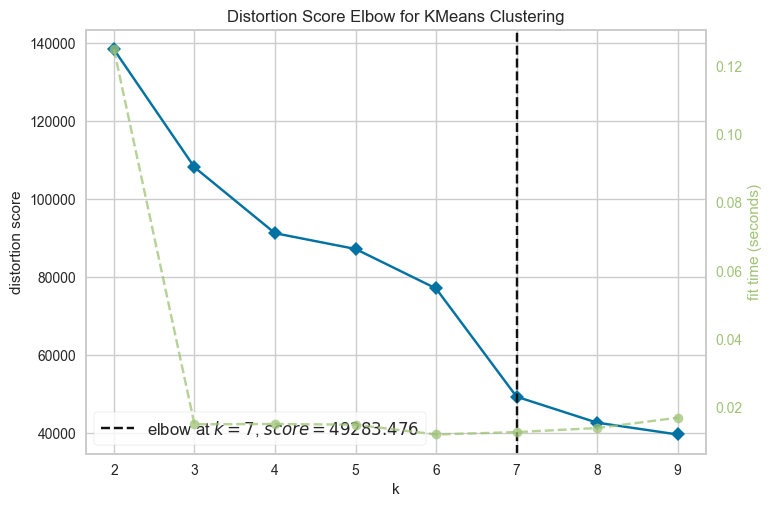

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2, 10), metric='distortion')
visualizer.fit(data_scaled)
visualizer.show()

In [21]:
from sklearn.metrics import silhouette_score

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data_scaled)
    score = silhouette_score(data_scaled, labels)
    print(f"Silhouette Score for K={k}: {score:.4f}")

Silhouette Score for K=2: 0.2109
Silhouette Score for K=3: 0.2492
Silhouette Score for K=4: 0.2792
Silhouette Score for K=5: 0.2578
Silhouette Score for K=6: 0.2847
Silhouette Score for K=7: 0.3093
Silhouette Score for K=8: 0.3279
Silhouette Score for K=9: 0.3196
Silhouette Score for K=10: 0.3291


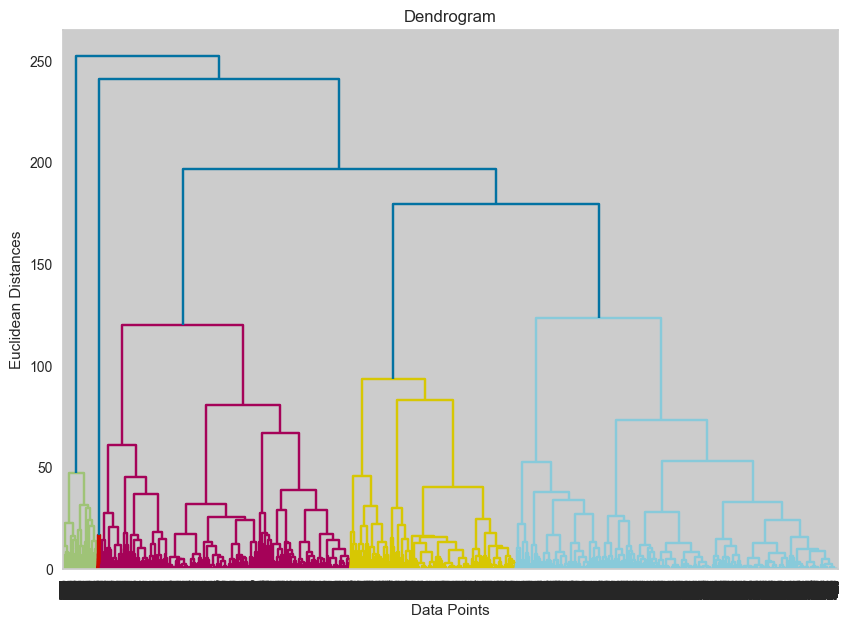

In [23]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

agg_clustering = AgglomerativeClustering(n_clusters=4)
agg_labels = agg_clustering.fit_predict(data_scaled)

plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(data_scaled, method='ward'))
plt.title("Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distances")
plt.show()

In [24]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(data_scaled)

n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print(f"Number of clusters found by DBSCAN: {n_clusters}")

Number of clusters found by DBSCAN: 17


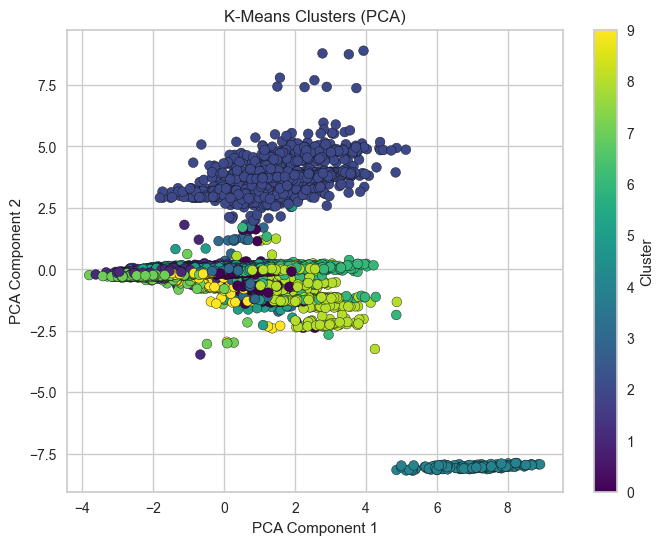

In [25]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=kmeans.labels_, cmap="viridis", marker="o", edgecolor="k")
plt.title("K-Means Clusters (PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()

In [27]:
data["Cluster"] = kmeans.labels_

# Select only numeric columns for the summary
numeric_columns = data.select_dtypes(include=['number']).columns
cluster_summary = data.groupby("Cluster")[numeric_columns].mean()
print(cluster_summary)

               age         fnlwgt  education-num  capital-gain  capital-loss  \
Cluster                                                                        
0        32.232385  190501.928838      13.038497    612.816846      0.910873   
1        44.945708  206011.472079       4.334023    202.223371      0.826784   
2        41.610924  185523.364801      10.985840      0.000000   1902.141605   
3        49.407000  181547.779153       9.370319    591.650008      1.462479   
4        46.358491  192968.886792      12.918239  99999.000000      0.000000   
5        65.356042  179826.224655       9.552311    571.729927      1.699919   
6        38.957532  177842.645954      10.292803    684.708091      0.685293   
7        23.213816  192190.474342       9.365132    114.249342      0.137829   
8        50.609290  181608.602609      13.552657   2411.167038      0.811009   
9        28.397860  199477.949194       9.225803    251.491591      0.018229   

         hours-per-week  Cluster  
Clus

In [28]:
final_score = silhouette_score(data_scaled, kmeans.labels_)
print(f"Final Silhouette Score: {final_score:.4f}")

Final Silhouette Score: 0.3291


In [29]:
cluster_distribution = data["Cluster"].value_counts().sort_index()
print("Cluster Distribution:\n", cluster_distribution)

Cluster Distribution:
 Cluster
0    4286
1    1934
2    1483
3    6543
4     159
5    1233
6    2237
7    3040
8    3143
9    8503
Name: count, dtype: int64
